## Observations and Insights 

INSIGHTS: 
Combining the two data sets of mice and results thorugh an inner merge, I found duplicate rows with the same Mouse ID's and Timepoints. Each mouse should only have a single row per timepoint.
The duplicates timepoints (that I decided to drop) were most probably to be associated to human error or machinery that took the values twice.

Looking at the summary statistics, Capomulin and Ramicane are the two drugs in the study showing the most promising values. The same observation can be seen in the bar chart, where the number of measurements for the two above-mentioned drugs are greater than the others, meaning the mice died in a later date).

This also can be easily seen plotting the data using a boxplot. Analizing 4 mice data only, Catamulin seems to show a clear path of success in the drug trial: as the trial progresses, the tumor volume values significantly lower in all cases in exam. 

Lastly, the correlation between mouse weight and Average tumor volume is 0.84. This is a strong positive correlation, which means that weight plays a role: the volume of the tumor increases linearly with the increase of the weight of the mouse.


In [162]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [163]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [164]:
# Check the number of unique mice in the table.
mouse_metadata['Mouse ID'].nunique()

249

In [165]:
# Merge the data into a single dataset using the inner join and merge on the Mouse ID.

df_combined = pd.merge(mouse_metadata, study_results,
                                 how='inner', on='Mouse ID')
df_combined

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [166]:
# Find any duplicate rows with the same Mouse ID's and Timepoints. Each mouse should only have a single row per timepoint

# Optional: Get all the data for the duplicate mouse ID by Returning boolean Series denoting duplicate rows 
#on a subset, putting the result in a column, and make a boolean mask


df_combined['Duplicates'] = df_combined.duplicated(subset = ['Mouse ID','Timepoint'])
df_combined

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicates
0,k403,Ramicane,Male,21,16,0,45.000000,0,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,False
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,False
1889,z969,Naftisol,Male,9,30,30,65.841013,3,False
1890,z969,Naftisol,Male,9,30,35,69.176246,4,False
1891,z969,Naftisol,Male,9,30,40,70.314904,4,False


In [167]:
df_combined[df_combined['Duplicates'] == True]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicates
909,g989,Propriva,Female,21,26,0,45.000000,0,True
911,g989,Propriva,Female,21,26,5,47.570392,0,True
913,g989,Propriva,Female,21,26,10,49.880528,0,True
915,g989,Propriva,Female,21,26,15,53.442020,0,True
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [168]:
#Drop duplicates in place on the same subset. 

df_combined.drop_duplicates(subset = ['Mouse ID','Timepoint'], inplace = True)
df_combined

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicates
0,k403,Ramicane,Male,21,16,0,45.000000,0,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,False
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,False
1889,z969,Naftisol,Male,9,30,30,65.841013,3,False
1890,z969,Naftisol,Male,9,30,35,69.176246,4,False
1891,z969,Naftisol,Male,9,30,40,70.314904,4,False


In [169]:
# Recheck the number of unique mice. Always 249 with 1888 data points, 5 less than the original datapoints.
df_combined['Mouse ID'].nunique()

249

## Summary Statistics

In [170]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
#for each regimen calculating the entire population.

df_drugregimen = df_combined.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
df_drugregimen.rename(columns={'mean': 'Mean','median':"Median", 'var': 'Variance', 'std': 'Standard_Deviation','sem':'Standard_Error'})

# Assemble the resulting series into a single summary dataframe using the build-in function mean, median, var, std and sem functions 
#calling groupby + aggregate.


,Mean,Median,Variance,Standard_Deviation,Standard_Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [171]:
# Generate a pandas bar chart showing the total number of datapoints for each drug regimen.
#Sorting the series which has index as drug and count as value. 
df_combined.groupby('Drug Regimen')['Timepoint'].agg('count').sort_values(ascending= False)

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     156
Name: Timepoint, dtype: int64

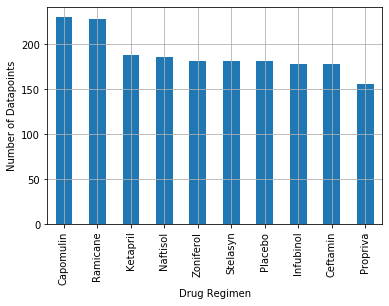

In [172]:
df_combined.groupby('Drug Regimen')['Timepoint'].agg('count').sort_values(ascending= False).plot(kind='bar')
plt.ylabel("Number of Datapoints" )
plt.xlabel("Drug Regimen")
plt.grid()

In [173]:
# To be able to plot through matplotlib, i collected the name of the drugs for the x axis label, 
#drug_grouped contains the numerical values to plot on the y axis.
drug_grouped =df_combined.groupby('Drug Regimen')['Timepoint'].agg('count').sort_values(ascending= False)

drugs = drug_grouped.keys()

drug_grouped
drugs

Index(['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol',
       'Stelasyn', 'Placebo', 'Infubinol', 'Ceftamin', 'Propriva'],
      dtype='object', name='Drug Regimen')

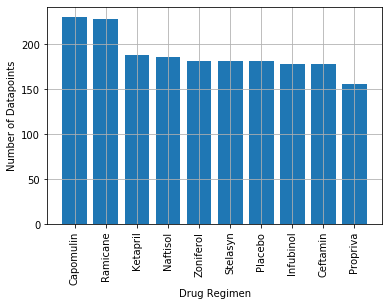

In [174]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.bar(drugs,drug_grouped, align="center")
plt.xticks (rotation=90)
plt.ylabel("Number of Datapoints" )
plt.xlabel("Drug Regimen")

plt.grid()


In [175]:
# Generate a pie chart showing the distribution of female versus male mice using pandas. 
#one solution:
# I create a mask to filter out the 0 stage of the time point to get the exact number of mice.
#I then group by Sex and specifically on the Mouse ID and call the count with aggregate. This solution would not be 
#correct if the scientists start analyzing mice always after Timepoint 0. We can't know that for sure. The filter 
#df_sex = df_combined[df_combined['Timepoint']== 0] would work


#Second solution: I call drop duplicates again on the column Mouse ID to drop all duplicate timepoints and then aggregate by
#sex.

df_sex = df_combined.drop_duplicates('Mouse ID')

sex_distribution= df_sex.groupby('Sex')['Mouse ID'].agg('count') 

sex_distribution
#sex_distribution

Sex
Female    124
Male      125
Name: Mouse ID, dtype: int64

Text(0, 0.5, 'Sex')

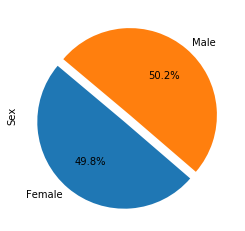

In [176]:
explode = (0.1, 0)
sex_distribution.plot(kind='pie', explode = explode, autopct="%1.1f%%", startangle=140)
plt.ylabel('Sex')

Text(0.5, 1.0, 'Sex')

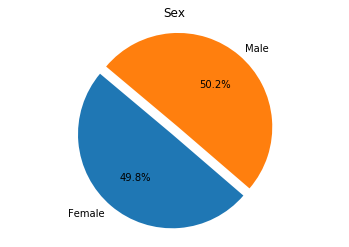

In [177]:
# Generate a pie chart showing the distribution of female versus male mice using matplotlib

sex_names = sex_distribution.keys()
sex_distribution

plt.pie(sex_distribution, explode = explode, labels=sex_names, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Sex')


## Quartiles, Outliers and Boxplots

In [178]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, Ceftamin. The data shows that not all mice lived until timepoint 45
# Create a dataframe grouping by MOUSE ID and max value of Timepoints  
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#I used both MOUSE ID AND Timepoint to execute the merge

df_combined

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicates
0,k403,Ramicane,Male,21,16,0,45.000000,0,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,False
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,False
1889,z969,Naftisol,Male,9,30,30,65.841013,3,False
1890,z969,Naftisol,Male,9,30,35,69.176246,4,False
1891,z969,Naftisol,Male,9,30,40,70.314904,4,False


In [179]:
tumor_last = pd.DataFrame(df_combined.groupby('Mouse ID')['Timepoint'].max())

tumor_last

,Timepoint
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30
...,...
z435,10
z578,45
z581,45


In [180]:
merged_df=pd.merge(tumor_last,df_combined, on= ['Mouse ID', 'Timepoint'], how = 'inner')
merged_df


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites,Duplicates
0,a203,45,Infubinol,Female,20,23,67.973419,2,False
1,a251,45,Infubinol,Female,21,25,65.525743,1,False
2,a262,45,Placebo,Female,17,29,70.717621,4,False
3,a275,45,Ceftamin,Female,20,28,62.999356,3,False
4,a366,30,Stelasyn,Female,16,29,63.440686,1,False
...,...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0,False
245,z578,45,Ramicane,Male,11,16,30.638696,0,False
246,z581,45,Infubinol,Female,24,25,62.754451,3,False
247,z795,45,Naftisol,Female,13,29,65.741070,3,False


In [181]:
# build a list 'drugs' with the 4 treatment regimes assigned
# set an empty dictionary "drug_container"
# build a foor loop which loops over the drugs in the list, filter out each single one at every loop, give me back a dataframe
# for each and fill the dictionary'drugs_container"

# call the 4 dataframe separately with the keys

In [182]:
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drugs_container = {}
for drug in drugs:
    drugs_container[drug] = merged_df[merged_df['Drug Regimen'] == drug]
    
drugs_container['Capomulin']   


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites,Duplicates
19,b128,45,Capomulin,Female,9,22,38.982878,2,False
24,b742,45,Capomulin,Male,7,21,38.939633,0,False
61,f966,20,Capomulin,Male,16,17,30.485985,0,False
64,g288,45,Capomulin,Male,3,19,37.074024,1,False
66,g316,45,Capomulin,Female,22,22,40.159220,2,False
81,i557,45,Capomulin,Female,1,24,47.685963,1,False
84,i738,45,Capomulin,Female,23,20,37.311846,2,False
86,j119,45,Capomulin,Female,7,23,38.125164,1,False
88,j246,35,Capomulin,Female,21,21,38.753265,1,False
109,l509,45,Capomulin,Male,17,21,41.483008,3,False


In [183]:
drugs_container['Ramicane']   

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites,Duplicates
6,a411,45,Ramicane,Male,3,22,38.407618,1,False
7,a444,45,Ramicane,Female,10,25,43.047543,0,False
10,a520,45,Ramicane,Male,13,21,38.810366,1,False
12,a644,45,Ramicane,Female,7,17,32.978522,1,False
33,c458,30,Ramicane,Female,23,20,38.342008,2,False
37,c758,45,Ramicane,Male,9,17,33.397653,1,False
45,d251,45,Ramicane,Female,8,19,37.311236,2,False
52,e662,45,Ramicane,Male,8,24,40.659006,2,False
70,g791,45,Ramicane,Male,11,16,29.128472,1,False
77,i177,45,Ramicane,Male,10,18,33.562402,3,False


In [184]:
drugs_container['Infubinol']  

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites,Duplicates
0,a203,45,Infubinol,Female,20,23,67.973419,2,False
1,a251,45,Infubinol,Female,21,25,65.525743,1,False
11,a577,30,Infubinol,Female,6,25,57.031862,2,False
13,a685,45,Infubinol,Male,8,30,66.083066,3,False
27,c139,45,Infubinol,Male,11,28,72.226731,2,False
31,c326,5,Infubinol,Female,18,25,36.321346,0,False
41,c895,30,Infubinol,Female,7,29,60.969711,2,False
50,e476,45,Infubinol,Male,23,26,62.435404,1,False
56,f345,45,Infubinol,Male,23,26,60.918767,1,False
79,i386,40,Infubinol,Female,23,29,67.289621,4,False


In [185]:
drugs_container['Ceftamin'] 

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites,Duplicates
3,a275,45,Ceftamin,Female,20,28,62.999356,3,False
21,b447,0,Ceftamin,Male,2,30,45.000000,0,False
22,b487,25,Ceftamin,Female,6,28,56.057749,1,False
25,b759,30,Ceftamin,Female,12,25,55.742829,1,False
58,f436,15,Ceftamin,Female,3,25,48.722078,2,False
76,h531,5,Ceftamin,Male,5,27,47.784682,0,False
89,j296,45,Ceftamin,Female,24,30,61.849023,3,False
95,k210,45,Ceftamin,Male,15,28,68.923185,3,False
107,l471,45,Ceftamin,Female,7,28,67.748662,1,False
108,l490,30,Ceftamin,Male,24,26,57.918381,3,False


In [186]:
# Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

# Loop over regimen in list previous list 'drugs', 
# use dictionary drugs_container, this time looping over the variable regimen, and select 'Tumor Volume (mm3)'
# use pandas function to determin quartile .quantile([0.25,0.5,0.75])
# determine 1st and 3rd quartiles, interquartile range, and median
# determine lower and upper bound (the whiskers of my boxplot). All values outside are outliers.
# Registered only one OUTLIER
#
   #Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
#31     c326          5    Infubinol  Female          18          25  

for regimen in drugs: 
    print(regimen)
    quartiles = drugs_container[regimen]['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f" lower quartile : {lowerq}")
    print(f" upper quartile of is: {upperq}")
    print(f" interquartile range of is: {iqr}")
    print(f"The median of is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
    dt_tmp = drugs_container[regimen] 
    outlier_regimen = dt_tmp[(dt_tmp['Tumor Volume (mm3)'] <= lower_bound) | (dt_tmp['Tumor Volume (mm3)'] >= upper_bound)]
    print('OUTLIER')
    print(outlier_regimen)

Capomulin
 lower quartile : 32.37735684
 upper quartile of is: 40.1592203
 interquartile range of is: 7.781863460000004
The median of is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
OUTLIER
Empty DataFrame
Columns: [Mouse ID, Timepoint, Drug Regimen, Sex, Age_months, Weight (g), Tumor Volume (mm3), Metastatic Sites, Duplicates]
Index: []
Ramicane
 lower quartile : 31.56046955
 upper quartile of is: 40.65900627
 interquartile range of is: 9.098536719999998
The median of is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
OUTLIER
Empty DataFrame
Columns: [Mouse ID, Timepoint, Drug Regimen, Sex, Age_months, Weight (g), Tumor Volume (mm3), Metastatic Sites, Duplicates]
Index: []
Infubinol
 lower quartile : 54.04860769
 upper quartile of is: 65.52574285
 interquartile range of is: 11.477135160000003
The median of is: 60.16518046 
Values below 36.83290494999999 co

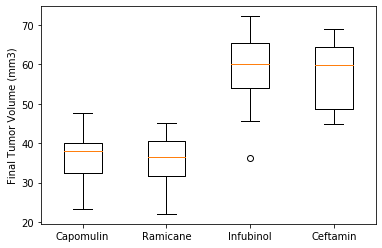

In [187]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# There should be a single chart with four box plots inside it.

regimens = [drugs_container['Capomulin']['Tumor Volume (mm3)'],
            drugs_container['Ramicane']['Tumor Volume (mm3)'],
            drugs_container['Infubinol']['Tumor Volume (mm3)'],
            drugs_container['Ceftamin']['Tumor Volume (mm3)'] ]
plt.boxplot(regimens)
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4],['Capomulin','Ramicane', 'Infubinol','Ceftamin'])
plt.show()


## Line and Scatter Plots

In [188]:
# Generate a line plot of tumor volume vs. timepoint for a single mouse treated with Capomulin. 
#Took a Male Mouse
Mouse_m601=df_combined[(df_combined['Drug Regimen'] == 'Capomulin') & (df_combined['Mouse ID'] == 'm601') ]
Mouse_m601

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicates
30,m601,Capomulin,Male,22,17,0,45.000000,0,False
31,m601,Capomulin,Male,22,17,5,41.408591,1,False
32,m601,Capomulin,Male,22,17,10,36.825367,1,False
33,m601,Capomulin,Male,22,17,15,35.464612,1,False
34,m601,Capomulin,Male,22,17,20,34.255732,1,False
35,m601,Capomulin,Male,22,17,25,33.118756,1,False
36,m601,Capomulin,Male,22,17,30,31.758275,1,False
37,m601,Capomulin,Male,22,17,35,30.834357,1,False
38,m601,Capomulin,Male,22,17,40,31.378045,1,False
39,m601,Capomulin,Male,22,17,45,28.430964,1,False


In [189]:
#Found another mouse data as I wanted to compare Male and Female
Mouse_t565=df_combined[(df_combined['Drug Regimen'] == 'Capomulin') & (df_combined['Mouse ID'] == 't565') ]
Mouse_t565

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicates
155,t565,Capomulin,Female,20,17,0,45.000000,0,False
156,t565,Capomulin,Female,20,17,5,45.895647,0,False
157,t565,Capomulin,Female,20,17,10,46.749006,0,False
158,t565,Capomulin,Female,20,17,15,44.440949,0,False
159,t565,Capomulin,Female,20,17,20,39.070214,0,False
160,t565,Capomulin,Female,20,17,25,37.342210,0,False
161,t565,Capomulin,Female,20,17,30,32.868916,0,False
162,t565,Capomulin,Female,20,17,35,33.515671,0,False
163,t565,Capomulin,Female,20,17,40,33.949341,0,False
164,t565,Capomulin,Female,20,17,45,34.455298,0,False


In [190]:
# Generate a line plot of tumor volume vs. timepoint for a single mouse treated with Capomulin. 
#Took a Female Mouse
Mouse_j246=df_combined[(df_combined['Drug Regimen'] == 'Capomulin') & (df_combined['Mouse ID'] == 'j246') ]
Mouse_j246

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicates
310,j246,Capomulin,Female,21,21,0,45.000000,0,False
311,j246,Capomulin,Female,21,21,5,45.641438,0,False
312,j246,Capomulin,Female,21,21,10,46.408361,0,False
313,j246,Capomulin,Female,21,21,15,43.312654,0,False
314,j246,Capomulin,Female,21,21,20,44.020370,0,False
315,j246,Capomulin,Female,21,21,25,44.555226,0,False
316,j246,Capomulin,Female,21,21,30,38.044082,1,False
317,j246,Capomulin,Female,21,21,35,38.753265,1,False


In [191]:
# Generate a line plot of tumor volume vs. timepoint for a single mouse treated with Capomulin. 
#Took a Male Mouse
Mouse_g288=df_combined[(df_combined['Drug Regimen'] == 'Capomulin') & (df_combined['Mouse ID'] == 'g288') ]
Mouse_g288

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicates
235,g288,Capomulin,Male,3,19,0,45.000000,0,False
236,g288,Capomulin,Male,3,19,5,45.839400,0,False
237,g288,Capomulin,Male,3,19,10,46.304003,1,False
238,g288,Capomulin,Male,3,19,15,42.172301,1,False
239,g288,Capomulin,Male,3,19,20,42.957120,1,False
240,g288,Capomulin,Male,3,19,25,42.368692,1,False
241,g288,Capomulin,Male,3,19,30,42.874461,1,False
242,g288,Capomulin,Male,3,19,35,38.954115,1,False
243,g288,Capomulin,Male,3,19,40,36.356851,1,False
244,g288,Capomulin,Male,3,19,45,37.074024,1,False


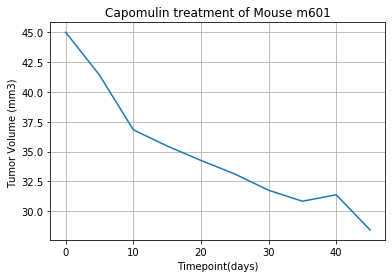

In [192]:
# Generate a line plot of tumor volume vs. timepoint for a single mouse treated with Capomulin
x_axis = Mouse_m601['Timepoint']
plt.plot(x_axis, Mouse_m601['Tumor Volume (mm3)'])
plt.title("Capomulin treatment of Mouse m601")
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume (mm3) ")
plt.grid()

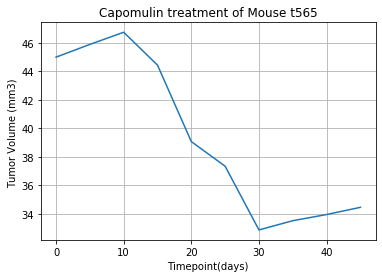

In [193]:
x_axis = Mouse_t565['Timepoint']
plt.plot(x_axis, Mouse_t565['Tumor Volume (mm3)'])

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.title("Capomulin treatment of Mouse t565")
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume (mm3) ")
plt.grid()

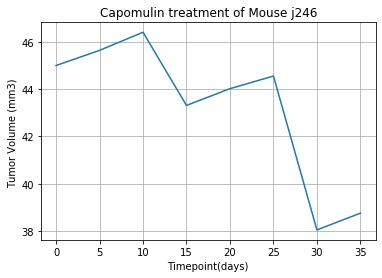

In [194]:
# Generate a line plot of tumor volume vs. timepoint for a single mouse treated with Capomulin
x_axis = Mouse_j246['Timepoint']
plt.plot(x_axis, Mouse_j246['Tumor Volume (mm3)'])
plt.title("Capomulin treatment of Mouse j246")
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume (mm3) ")
plt.grid()

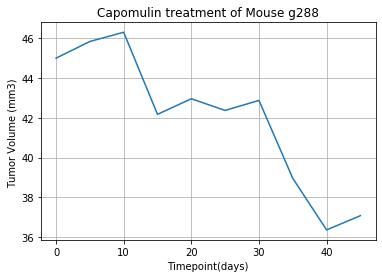

In [195]:
# Generate a line plot of tumor volume vs. timepoint for a single mouse treated with Capomulin
x_axis = Mouse_g288['Timepoint']
plt.plot(x_axis, Mouse_g288['Tumor Volume (mm3)'])
plt.title("Capomulin treatment of Mouse g288")
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume (mm3) ")
plt.grid()

In [196]:
# Generate a scatter plot of a mouse's average tumor volume over all timepoints 
# vs. that mouse's weight for all mice in the Capomulin regimen

Average_tumor_vol=df_combined[(df_combined['Drug Regimen'] == 'Capomulin')].groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
Average_tumor_vol

Mouse ID
b128    41.963636
b742    40.083699
f966    36.505973
g288    41.990097
g316    44.613344
i557    44.805810
i738    39.141053
j119    44.465236
j246    43.216925
l509    44.434474
l897    42.507261
m601    34.847470
m957    39.049816
r157    45.798970
r554    36.509212
r944    43.367364
s185    34.559143
s710    42.803733
t565    39.328725
u364    39.887495
v923    41.581595
w150    41.384825
w914    41.352452
x401    36.182040
y793    38.506829
Name: Tumor Volume (mm3), dtype: float64

In [197]:
mouse_weight = df_combined[(df_combined['Drug Regimen'] == 'Capomulin')].groupby('Mouse ID')['Weight (g)'].mean()
mouse_weight

Mouse ID
b128    22
b742    21
f966    17
g288    19
g316    22
i557    24
i738    20
j119    23
j246    21
l509    21
l897    19
m601    17
m957    19
r157    25
r554    17
r944    25
s185    17
s710    23
t565    17
u364    17
v923    21
w150    23
w914    21
x401    15
y793    17
Name: Weight (g), dtype: int64

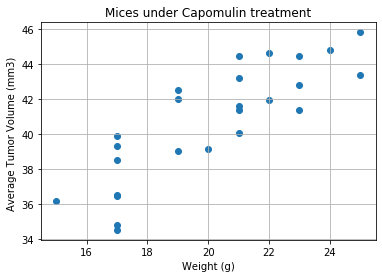

In [198]:
plt.scatter(mouse_weight, Average_tumor_vol)
plt.title("Mices under Capomulin treatment")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3) ")
plt.grid()

## Correlation and Regression

The correlation between mouse weight and Average tumor volume is 0.84


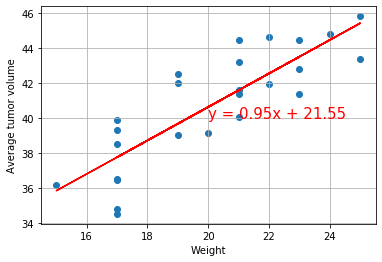

In [199]:
# Calculate the correlation coefficient and linear regression model for mouse weight 
# and average tumor volume for the Capomulin regimen

x_values = mouse_weight
y_values = Average_tumor_vol

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,40),fontsize=15,color="red")
plt.xlabel('Weight')
plt.ylabel('Average tumor volume')
plt.grid()

# Get correlation efficient
correlation = st.pearsonr(mouse_weight,Average_tumor_vol)
print(f"The correlation between mouse weight and Average tumor volume is {round(correlation[0],2)}")
plt.show()